In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('0415/lab6_given.ipynb')

Mounted at /content/drive
--2021-04-15 09:39:29--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-04-15 09:39:29 (45.9 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/0415/lab6_given.ipynb to pdf
[NbConvertApp] Support files will be in lab6_given_files/
[NbConvertApp] Making directory ./lab6_given_files
[NbConvertApp] Making directory ./lab6_given_files
[NbConvertApp] Writing 39258 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConver

'File Download Unsuccessful. Saved in Google Drive'

#1. Perspective Projection Correction
Correct the source image in reference with the destination image

In [ ]:
#Download the images
!gdown --id '1O3_PJ9bTKJbf89b2_SUEuFkbTXrmCsrK' --output book1.jpg
!gdown --id '1Qh1Ydq9bJezPfGvdFCnF-9iN5Yp_Kv1r' --output book2.jpg

Downloading...
From: https://drive.google.com/uc?id=1O3_PJ9bTKJbf89b2_SUEuFkbTXrmCsrK
To: /content/book1.jpg
2.86MB [00:00, 90.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Qh1Ydq9bJezPfGvdFCnF-9iN5Yp_Kv1r
To: /content/book2.jpg
2.76MB [00:00, 88.1MB/s]


In [ ]:
#Read the source Image
im_src = cv2.imread("book1.jpg")
#Read the destination Image
im_dst = cv2.imread("book2.jpg")
#display the images
cv2_imshow(im_src)
cv2_imshow(im_dst)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Identify the coordinates of the points marked in red color in the source image
pts_src = np.array([[1053,1633], [1821,469], [2033,1064],[1969,1838],[2933,1050]])

#Identify the coordinates of the points marked in red color in the destination image
pts_dst = np.array([[1247,527],[2941,549],[2393,1148],[1541,1556],[2957,2105]])

#Calculate the homography use function cv2.findHomography
h, status = cv2.findHomography(pts_src, pts_dst)
#Wrap the images using cv2.warpPerspective
im_out = cv2.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))
#display the corrected image
cv2_imshow(im_out)

Output hidden; open in https://colab.research.google.com to view.

#2. Image Stitching
Stitch first two images into one from the image dataset

In [ ]:
# download the images (6 Images)
!gdown --id '1CDPf0zhlVYR7Fd1vSL22A10KSLb3JeCl' --output site1.jpg
!gdown --id '1b7EZ_nLLUx_sjjHlPGxW4kaXRsZFVDzu' --output site2.jpg
!gdown --id '1KQ2xVihVNdUNtHnurStDbtD4L6AbhPZL' --output site3.jpg
!gdown --id '1gu3C0ZUMGcfRjyZHZbte_gesbUuBpW0S' --output site4.jpg
!gdown --id '1zHAtikO9dVHpLPJ-KQPdvKEC-wLB1hHM' --output site5.jpg
!gdown --id '1RNCdBF9a4fIdcyPvjelyx7dsheLgRoaQ' --output site6.jpg

# use openCV to read the original image
img_1 = cv2.imread('site1.jpg')
img_2 = cv2.imread('site2.jpg')
img_3 = cv2.imread('site3.jpg')
img_4 = cv2.imread('site4.jpg')
img_5 = cv2.imread('site5.jpg')
img_6 = cv2.imread('site6.jpg')

#Resize images for convenience
def resizeimg (img):
  img_1 = cv2.resize(img, (int(img.shape[1]*0.1),int(img.shape[0]*0.1)), interpolation = cv2.INTER_AREA)
  return img_1 
img_1 = resizeimg(img_1)
img_2 = resizeimg(img_2)
img_3 = resizeimg(img_3)
img_4 = resizeimg(img_4)
img_5 = resizeimg(img_5)
img_6 = resizeimg(img_6)

#Display the images
cv2_imshow(img_1)
cv2_imshow(img_2)
cv2_imshow(img_3)
cv2_imshow(img_4)
cv2_imshow(img_5)
cv2_imshow(img_6)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Write a function named 'imagestitcher' that can stitch two images
def imagestitcher (img1, img2):
    
    #Convert input images to grayscale
    img1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)    
    
    #SIFT Feature detection: try cv2.xfeatures2d.SIFT_create, sift.detectAndCompute
    sift = cv2.xfeatures2d.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    
    #Feature matching use cv2.BFMatcher(), bf.knnMatch
    bf = cv2.BFMatcher()
    matches =  bf.knnMatch(des1,des2, k=2) # K nearest neighbour matching with k =2
    good = [] # Store good matches into a list if the distance between corresponding matches lies between 0.5
    for m in matches:
        if (m[0].distance < 0.5*m[1].distance):
            good.append(m)
    matches = np.asarray(good)
    
    #Homography calculation using RANSAC use cv2.findHomography, cv2.RANSAC and reprojection theshold =5
    if (len(matches[:,0]) >= 4): # for ma
        src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
        dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
        H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0) # Write yourself
    else:
        raise AssertionError('Can’t find enough keypoints.')
    
    #Image Stitching use cv2.warpPerspective(1st image, homography matrix, size of the output image)
    dst = cv2.warpPerspective(img_1,H,((int(img_1.shape[1]*0.5) + img_2.shape[1]) , img_2.shape[0])) #wraped image
    dst[0:img_2.shape[0], 0:img_2.shape[1]] = img_2 #stitched image
    return dst

In [ ]:
#In case your Open CV version do not support SIFT
!pip install opencv-contrib-python==3.4.2.17

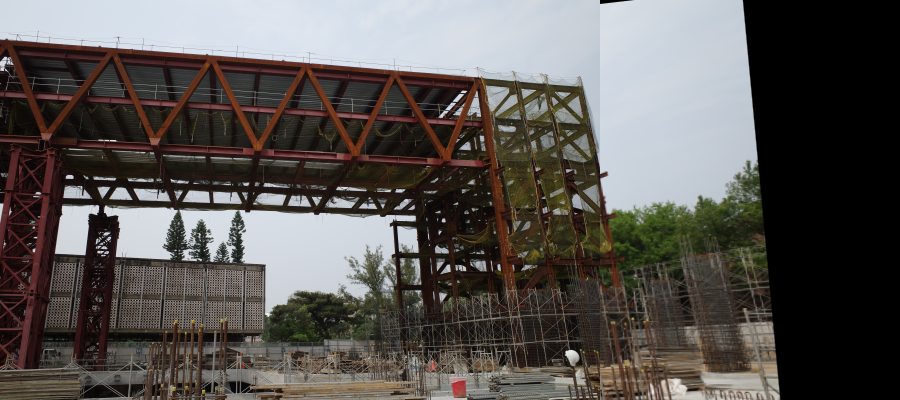

In [ ]:
#Stitch the first two site images into one and display
stitched_img = imagestitcher(img_1,img_2)
cv2_imshow(stitched_img)

#3. Panorama creation
Create a panorama combining all 6 images

In [ ]:
#In case your Open CV version do not support SIFT
!pip install opencv-contrib-python==4.4.0.46

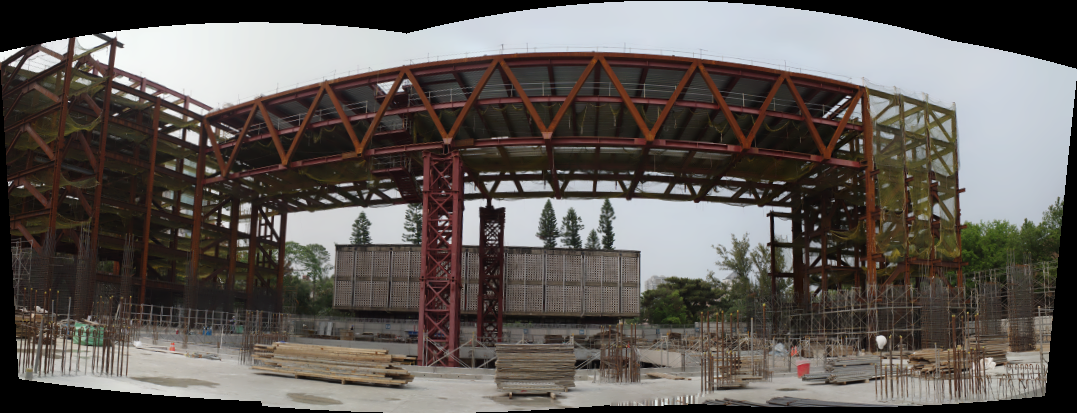

In [ ]:
#Stitch all 6 images to make a Panorama
images = [img_1,img_2,img_3,img_4,img_5,img_6]
stitcher = cv2.Stitcher_create()
(status, pano) = stitcher.stitch(images)
cv2_imshow(pano)